Pour une lecture améliorée, ce notebook est idéalement lu avec une extension qui gère les niveaux des titres Markdown.  
Par exemple avec l'extension 'Table of Contents' du module 'Nbextensions' de Jupyter.

# Mise en place du notebook

## Import des modules

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import missingno as msno

## Gestion des paramètres d'affichage de Jupyter

In [30]:
# pour gérer l'affichage des dataframes pandas
pd.options.display.max_rows = 100
pd.options.display.max_columns = 200

# pour gérer l'affichage des arrays numpy
# 230 sur ma config bureau, 165 sur ma config portable
np.set_printoptions(linewidth=165)

# pour afficher les gros fichiers sur toute la largeur de l'écran
from IPython.core.display import HTML
HTML("<style>.container { width:95% }</style>")

## Notes

Gross floor area (GFA) - The total floor area contained within the building measured to the external face of the external walls. Mesuré en square feet.  

1 sq foot = 0.092 m²  

ENERGYSTARScore : score de 1 à 100. Le score correspond au centile dans lequel le bâtiment se trouve.  

Energy Use Intensity (EUI) is a property's Site Energy Use divided by its gross floor area.  

1 acre = 4047 m²  

1 British thermal unit (kBtu) per square foot = 3.2 kW.h/m²  

1 kBTU = 0.29 kW.h  

SPD beats : rondes de la police (SPD = Seattle PD)

# Récupération des données

## Lecture des fichiers .json (metadata)

### Fichier pour 2015

#### Affichage intégral du json :

In [31]:
with open('socrata_metadata_2015-building-energy-benchmarking.json') as f:
  df2015metadata = json.load(f)
print(json.dumps(df2015metadata, indent = 4, sort_keys=False))

{
    "id": "h7rm-fz6m",
    "name": "2015 Building Energy Benchmarking",
    "assetType": "dataset",
    "attribution": "City of Seattle",
    "attributionLink": "http://www.seattle.gov/environment",
    "averageRating": 0,
    "createdAt": 1492461362,
    "description": "Seattle\u2019s Building Energy Benchmarking and Reporting Program (SMC 22.920) requires owners of non-residential and multifamily buildings (20,000 square feet or larger) to track energy performance and annually report to the City of Seattle. Buildings account for 33% of Seattle's core emissions. The benchmarking policy supports Seattle's goals to reduce energy use and greenhouse gas emissions from existing buildings. In 2013, the City of Seattle adopted a Climate Action Plan to achieve zero net greenhouse gas (GHG) emissions by 2050. Annual benchmarking, reporting and disclosing of building performance are foundational elements of creating more market value for energy efficiency.\r\nPer Ordinance (125000), starting 

Sections du json :

In [32]:
df2015metadata.keys()

dict_keys(['id', 'name', 'assetType', 'attribution', 'attributionLink', 'averageRating', 'createdAt', 'description', 'displayType', 'downloadCount', 'hideFromCatalog', 'hideFromDataJson', 'indexUpdatedAt', 'licenseId', 'newBackend', 'numberOfComments', 'oid', 'provenance', 'publicationAppendEnabled', 'publicationDate', 'publicationGroup', 'publicationStage', 'rowsUpdatedAt', 'rowsUpdatedBy', 'tableId', 'totalTimesRated', 'viewCount', 'viewLastModified', 'viewType', 'approvals', 'columns', 'grants', 'license', 'metadata', 'owner', 'query', 'rights', 'tableAuthor', 'tags', 'flags'])

#### Affichage intégral de la section "columns" :

In [33]:
nbcol = len(df2015metadata["columns"])
print("Nb de colonnes :", nbcol)

Nb de colonnes : 47


In [34]:
for column in range(len(df2015metadata["columns"])):
    print(f"********** Colonne {column} **********")
    print(df2015metadata["columns"][column])
    print()

********** Colonne 0 **********
{'id': 350402298, 'name': 'OSEBuildingID', 'dataTypeName': 'number', 'description': 'A unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes.', 'fieldName': 'seattlebuildingid', 'position': 1, 'renderTypeName': 'number', 'tableColumnId': 46302822, 'width': 182, 'cachedContents': {'largest': '50059', 'non_null': 3340, 'average': '20522.16826347305', 'null': '0', 'top': [{'item': '2', 'count': '1'}, {'item': '3', 'count': '1'}, {'item': '5', 'count': '1'}, {'item': '8', 'count': '1'}, {'item': '9', 'count': '1'}, {'item': '10', 'count': '1'}, {'item': '11', 'count': '1'}, {'item': '12', 'count': '1'}, {'item': '13', 'count': '1'}, {'item': '15', 'count': '1'}, {'item': '16', 'count': '1'}, {'item': '17', 'count': '1'}, {'item': '18', 'count': '1'}, {'item': '19', 'count': '1'}, {'item': '21', 'count': '1'}, {'item': '22', 'count': '1'}, {'item': '23', 'count': '1'}, {'item': '24',

#### Affichage simplifié de la section "columns" :

In [35]:
for column in range(nbcol):
    name = df2015metadata["columns"][column]['name']
    print(f"********** Colonne {column} : {name} **********")
    try :
        print(df2015metadata["columns"][column]['description'])
    except :
        print("Description non disponible")

********** Colonne 0 : OSEBuildingID **********
A unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes.
********** Colonne 1 : DataYear **********
Description non disponible
********** Colonne 2 : BuildingType **********
City of Seattle building type classification.
********** Colonne 3 : PrimaryPropertyType **********
The primary use of a property (e.g. office, retail store). Primary use is defined as a function that accounts for more than 50% of a property. This is the Property Type - EPA Calculated field from Portfolio Manager.
********** Colonne 4 : PropertyName **********
Official or common property name.
********** Colonne 5 : TaxParcelIdentificationNumber **********
	
Property King County PIN
********** Colonne 6 : Location **********
Description non disponible
********** Colonne 7 : CouncilDistrictCode **********
Property City of Seattle council district.
********** Colonne 8 : Neighborhood **********

### Fichier pour 2016

#### Affichage intégral du json :

In [36]:
with open('socrata_metadata_2016-building-energy-benchmarking.json') as f:
  df2016metadata = json.load(f)
print(json.dumps(df2016metadata, indent = 4, sort_keys=False))

{
    "id": "2bpz-gwpy",
    "name": "2016 Building Energy Benchmarking",
    "assetType": "dataset",
    "attribution": "City of Seattle",
    "attributionLink": "https://www.seattle.gov/energybenchmarking",
    "averageRating": 0,
    "createdAt": 1521070051,
    "description": "Seattle\u2019s Building Energy Benchmarking and Reporting Program (SMC 22.920) requires owners of non-residential and multifamily buildings (20,000 square feet or larger) to track energy performance and annually report to the City of Seattle. Buildings account for 33% of Seattle's core emissions. The benchmarking policy supports Seattle's goals to reduce energy use and greenhouse gas emissions from existing buildings. In 2013, the City of Seattle adopted a Climate Action Plan to achieve zero net greenhouse gas (GHG) emissions by 2050. Annual benchmarking, reporting and disclosing of building performance are foundational elements of creating more market value for energy efficiency.\nPer Ordinance (125000), sta

Sections du json :

In [37]:
df2016metadata.keys()

dict_keys(['id', 'name', 'assetType', 'attribution', 'attributionLink', 'averageRating', 'createdAt', 'description', 'displayType', 'downloadCount', 'hideFromCatalog', 'hideFromDataJson', 'indexUpdatedAt', 'licenseId', 'newBackend', 'numberOfComments', 'oid', 'provenance', 'publicationAppendEnabled', 'publicationDate', 'publicationGroup', 'publicationStage', 'rowIdentifierColumnId', 'rowsUpdatedAt', 'rowsUpdatedBy', 'tableId', 'totalTimesRated', 'viewCount', 'viewLastModified', 'viewType', 'approvals', 'columns', 'grants', 'license', 'metadata', 'owner', 'query', 'rights', 'tableAuthor', 'tags', 'flags'])

#### Affichage intégral de la section "columns" :

In [38]:
nbcol = len(df2016metadata["columns"])
print("Nb de colonnes :", nbcol)

Nb de colonnes : 46


In [39]:
for column in range(len(df2016metadata["columns"])):
    print(f"********** Colonne {column} **********")
    print(df2015metadata["columns"][column])
    print()

********** Colonne 0 **********
{'id': 350402298, 'name': 'OSEBuildingID', 'dataTypeName': 'number', 'description': 'A unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes.', 'fieldName': 'seattlebuildingid', 'position': 1, 'renderTypeName': 'number', 'tableColumnId': 46302822, 'width': 182, 'cachedContents': {'largest': '50059', 'non_null': 3340, 'average': '20522.16826347305', 'null': '0', 'top': [{'item': '2', 'count': '1'}, {'item': '3', 'count': '1'}, {'item': '5', 'count': '1'}, {'item': '8', 'count': '1'}, {'item': '9', 'count': '1'}, {'item': '10', 'count': '1'}, {'item': '11', 'count': '1'}, {'item': '12', 'count': '1'}, {'item': '13', 'count': '1'}, {'item': '15', 'count': '1'}, {'item': '16', 'count': '1'}, {'item': '17', 'count': '1'}, {'item': '18', 'count': '1'}, {'item': '19', 'count': '1'}, {'item': '21', 'count': '1'}, {'item': '22', 'count': '1'}, {'item': '23', 'count': '1'}, {'item': '24',

#### Affichage simplifié de la section "columns" :

In [40]:
for column in range(nbcol):
    name = df2016metadata["columns"][column]['name']
    print(f"********** Colonne {column} : {name} **********")
    try :
        print(df2016metadata["columns"][column]['description'])
    except :
        print("Description non disponible")

********** Colonne 0 : OSEBuildingID **********
A unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes.
********** Colonne 1 : DataYear **********
Calendar year (January-December) represented by each data record.
********** Colonne 2 : BuildingType **********
City of Seattle building type classification.
********** Colonne 3 : PrimaryPropertyType **********
The primary use of a property (e.g. office, retail store). Primary use is defined as a function that accounts for more than 50% of a property. This is the Property Type - EPA Calculated field from Portfolio Manager.
********** Colonne 4 : PropertyName **********
Official or common property name as entered in EPA’s Portfolio Manager.
********** Colonne 5 : Address **********
Property street address
********** Colonne 6 : City **********
Property city
********** Colonne 7 : State **********
Property state
********** Colonne 8 : ZipCode **********
Property zi

### Différences entre les variables de 2015 et 2016

Listes des variables de 2015, de 2016, et concaténation de ces deux listes

In [41]:
Liste_var_2015 = []
for column in range(len(df2015metadata["columns"])):
    name = df2015metadata["columns"][column]['name']
    Liste_var_2015.append(name)
Liste_var_2015

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'TaxParcelIdentificationNumber',
 'Location',
 'CouncilDistrictCode',
 'Neighborhood',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'OtherFuelUse(kBtu)',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'DefaultData',
 'Comment',
 'ComplianceStatus',
 'Outlier',
 '2010 Census Tracts',

In [42]:
Liste_var_2016 = []
for column in range(len(df2016metadata["columns"])):
    name = df2016metadata["columns"][column]['name']
    Liste_var_2016.append(name)
Liste_var_2016

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Address',
 'City',
 'State',
 'ZipCode',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'DefaultData',
 'Comments',
 'ComplianceStatus',
 'Outlier',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

In [43]:
Liste_var_2015_2016 = Liste_var_2015 + Liste_var_2016
# suppression de doublons (on n'utilise pas la fonction set() car on perd l'ordre )
Liste_var_2015_2016 = list(dict.fromkeys(Liste_var_2015_2016))
# impression des variables et des années de disponibilité
for var in Liste_var_2015_2016:
    print(var, end=' : ')
    if var in Liste_var_2015:
        print(" 2015", end='')
    if var in Liste_var_2016:
        print(" 2016", end='')
    print()

OSEBuildingID :  2015 2016
DataYear :  2015 2016
BuildingType :  2015 2016
PrimaryPropertyType :  2015 2016
PropertyName :  2015 2016
TaxParcelIdentificationNumber :  2015 2016
Location :  2015
CouncilDistrictCode :  2015 2016
Neighborhood :  2015 2016
YearBuilt :  2015 2016
NumberofBuildings :  2015 2016
NumberofFloors :  2015 2016
PropertyGFATotal :  2015 2016
PropertyGFAParking :  2015 2016
PropertyGFABuilding(s) :  2015 2016
ListOfAllPropertyUseTypes :  2015 2016
LargestPropertyUseType :  2015 2016
LargestPropertyUseTypeGFA :  2015 2016
SecondLargestPropertyUseType :  2015 2016
SecondLargestPropertyUseTypeGFA :  2015 2016
ThirdLargestPropertyUseType :  2015 2016
ThirdLargestPropertyUseTypeGFA :  2015 2016
YearsENERGYSTARCertified :  2015 2016
ENERGYSTARScore :  2015 2016
SiteEUI(kBtu/sf) :  2015 2016
SiteEUIWN(kBtu/sf) :  2015 2016
SourceEUI(kBtu/sf) :  2015 2016
SourceEUIWN(kBtu/sf) :  2015 2016
SiteEnergyUse(kBtu) :  2015 2016
SiteEnergyUseWN(kBtu) :  2015 2016
SteamUse(kBtu) :  

## Conversion des fichiers .csv en dataframe pandas

In [44]:
df2015 = pd.read_csv('2015-building-energy-benchmarking.csv',
                      sep=',',
                      low_memory=False)

df2016 = pd.read_csv('2016-building-energy-benchmarking.csv',
                      sep=',',
                      low_memory=False)


### Création des colonnes Latitude et Longitude pour le df2015

In [69]:
import ast     
df2015["Latitude"] = df2015["Location"].apply(lambda x : float(ast.literal_eval(x)['latitude']))     # ast.literal_eval(x) convertit le string x en dictionnaire
df2015["Longitude"] = df2015["Location"].apply(lambda x : float(ast.literal_eval(x)['longitude'])) 

In [68]:
df2015["Latitude"][0]

47.61219025

## Affichage de quelques lignes du dataframe

In [70]:
with pd.option_context('display.max_rows', 400, 'display.max_colwidth', 1000):
    display(df2015.head())
#     display(df2015.loc[[4]])
#     display(df2015.loc[4:5000])
    display(df2015.tail())

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,Latitude,Longitude
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122.33799744', 'human_address': '{""address"": ""405 OLIVE WAY"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.612190,-122.337997
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122.33335756', 'human_address': '{""address"": ""724 PINE ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.613106,-122.333358
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122.33769944', 'human_address': '{""address"": ""1900 5TH AVE"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081,47.613349,-122.337699
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122.33660889', 'human_address': '{""address"": ""620 STEWART ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081,47.614216,-122.336609
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122.3409238', 'human_address': '{""address"": ""401 LENORA ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98121""}'}",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576,47.613754,-122.340924


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,Latitude,Longitude
3335,50049,2015,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM,6599950000,"{'latitude': '47.59950256', 'longitude': '-122.32034302', 'human_address': '{""address"": ""321 10TH AVE S"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98104""}'}",2,DOWNTOWN,2000,1,4.0,44650,0,44650,Multifamily Housing,Multifamily Housing,44650.0,NaN,NaN,NaN,NaN,NaN,71.0,25.6,27.8,80.4,87.2,1142949.0,1240429.0,0.0,334979.0,1142996.0,0.0,0.0,0.0,7.97,0.07,No,NaN,Compliant,NaN,NaN,26.0,NaN,16.0,18379,47.599503,-122.320343
3336,50055,2015,Multifamily MR (5-9),Mid-Rise Multifamily,IDENTITY APTS 4123,1142001670,"{'latitude': '47.65752471', 'longitude': '-122.3160159', 'human_address': '{""address"": ""4123 12TH AVE NE"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98105""}'}",4,NORTHEAST,2014,1,7.0,42393,0,42393,Multifamily Housing,Multifamily Housing,31748.0,NaN,NaN,NaN,NaN,NaN,98.0,48.6,55.1,124.2,144.7,1543282.0,1750143.0,0.0,325705.0,1111352.0,4320.0,431976.0,0.0,30.69,0.61,No,NaN,Compliant,NaN,NaN,60.0,NaN,38.0,18383,47.657525,-122.316016
3337,50057,2015,Multifamily HR (10+),High-Rise Multifamily,CIRRUS,660000575,"{'latitude': '47.61649845', 'longitude': '-122.33770787', 'human_address': '{""address"": ""2030 8TH AVE"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98121""}'}",7,DOWNTOWN,2015,1,40.0,319481,41915,277566,"Multifamily Housing, Parking",NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.0,52.7,61.4,93.1,102.2,16834414.0,19623362.0,0.0,1690364.0,5767761.0,110669.0,11066893.0,0.0,627.97,1.89,No,NaN,Compliant,NaN,NaN,56.0,NaN,7.0,19576,47.616498,-122.337708
3338,50058,2015,Multifamily LR (1-4),Low-Rise Multifamily,WEDGEWOOD ESTATES BLDG A,6392001040,"{'latitude': '47.68396954', 'longitude': '-122.2874088', 'human_address': '{""address"": ""3801 NE 77TH ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98115""}'}",4,NORTHEAST,1981,1,3.0,48230,0,48230,Multifamily Housing,Multifamily Housing,22310.0,NaN,NaN,NaN,NaN,NaN,44.0,34.8,38.1,109.4,119.5,777064.0,849250.0,0.0,227744.0,777096.0,0.0,0.0,0.0,5.42,0.04,No,NaN,Compliant,NaN,NaN,55.0,NaN,48.0,18792,47.683970,-122.287409
3339,50059,2015,Multifamily LR (1-4),Low-Rise Multifamily,WEDGEWOOD ESTATES BLDG B,6392001040,"{'latitude': '47.68396954', 'longitude': '-122.2874088', 'human_address': '{""address"": ""7540 37TH AVE NE"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98115""}'}",4,NORTHEAST,1981,1,4.0,53100,0,53100,Multifamily Housing,Multifamily Housing,25265.0,NaN,NaN,NaN,NaN,NaN,24.0,38.2,41.7,120.1,130.9,966376.0,1053118.0,0.0,283229.0,966416.0,0.0,0.0,0.0,6.74,0.05,No,NaN,Compliant,NaN,NaN,55.0,NaN,48.0,18792,47.683970,-122.287409


In [47]:
with pd.option_context('display.max_rows', 400, 'display.max_colwidth', 1000):
    display(df2016.head())
#     display(df2016.loc[[4]])
#     display(df2016.loc[4:5000])
    display(df2016.tail(50))

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
3326,50047,2016,Multifamily MR (5-9),Mid-Rise Multifamily,Odin,5402 20th Ave. NW,Seattle,WA,98116.0,2767703631,6,BALLARD,47.66786,-122.38112,2014,2.0,7,318835,0,318835,"Multifamily Housing, Parking",Multifamily Housing,236227.0,Parking,82608.0,NaN,NaN,NaN,100.0,30.400000,31.100000,73.300003,75.599998,7.180055e+06,7.355683e+06,0.0,1.370294e+06,4.675443e+06,25046.109380,2.504611e+06,False,NaN,Compliant,NaN,165.61,0.52
3327,50049,2016,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM (ID50049),321 10TH AVE S,Seattle,WA,98104.0,6599950000,2,DOWNTOWN,47.59980,-122.32034,2000,1.0,4,44650,0,44650,Multifamily Housing,Multifamily Housing,44650.0,NaN,NaN,NaN,NaN,NaN,58.0,28.000000,29.200001,87.800003,91.800003,1.248599e+06,1.305528e+06,0.0,3.659434e+05,1.248599e+06,0.000000,0.000000e+00,False,NaN,Compliant,NaN,8.70,0.19
3328,50050,2016,Multifamily MR (5-9),Mid-Rise Multifamily,Cue Apartments (Whole-Building),1525 Harvard Ave,Seattle,WA,98122.0,6003000550,3,EAST,47.61508,-122.32243,2015,1.0,7,92208,11837,80371,"Multifamily Housing, Parking, Retail Store",Multifamily Housing,82208.0,Retail Store,10000.0,Parking,9000.000000,NaN,100.0,21.900000,21.900000,55.799999,55.799999,2.015280e+06,2.015280e+06,0.0,4.242336e+05,1.447485e+06,5677.949219,5.677950e+05,False,NaN,Compliant,NaN,40.25,0.44
3329,50054,2016,Nonresidential COS,Large Office,400 FAIRVIEW OFFICE BLDG,400 FAIRVIEW AVE N,Seattle,WA,98109.0,2467400120,7,LAKE UNION,47.62251,-122.33390,2014,1.0,13,536697,197659,339038,"Office, Parking, Retail Store",Office,342838.0,Parking,202178.0,Retail Store,6313.200195,NaN,98.0,37.900002,40.200001,99.199997,101.599998,1.323905e+07,1.403717e+07,0.0,2.909076e+06,9.925769e+06,33132.789060,3.313279e+06,False,NaN,Compliant,NaN,245.16,0.46
3330,50055,2016,Multifamily MR (5-9),Mid-Rise Multifamily,129610 - Identity Seattle Building D,4123 12th Ave NE,Seattle,WA,98105.0,1142001670,4,NORTHEAST,47.65756,-122.31584,2014,2.0,7,42393,0,42393,Multifamily Housing,Multifamily Housing,31748.0,NaN,NaN,NaN,NaN,NaN,96.0,51.200001,54.700001,132.100006,142.100006,1.625696e+06,1.736628e+06,0.0,3.486010e+05,1.189427e+06,4362.689941,4.362690e+05,False,NaN,Compliant,NaN,31.46,0.74
3331,50056,2016,Multifamily MR (5-9),Mid-Rise Multifamily,Kebero Court,1105 E Fir St,Seattle,WA,98122.0,9826700260,3,EAST,47.60246,-122.31771,2015,1.0,6,128460,0,128460,Multifamily Housing,Multifamily Housing,128460.0,NaN,NaN,NaN,NaN,NaN,99.0,16.600000,16.600000,52.000000,52.000000,2.127077e+06,2.127077e+06,0.0,6.234106e+05,2.127077e+06,0.000000,0.000000e+00,False,NaN,Compliant,NaN,14.83,0.12
3332,50083,2016,Multifamily MR (5-9),Mid-Rise Multifamily,Smith & Burns Apartments,4455 Interlake Ave N,Seattle,WA,98103.0,7821200210,4,LAKE UNION,47.66111,-122.34106,2015,1.0,5,175844,52045,123799,"Multifamily Housing, Parking",Multifamily Housing,99554.0,Parking,24000.0,NaN,NaN,NaN,99.0,32.000000,32.900002,77.699997,80.500000,3.182301e+06,3.271013e+06,0.0,6.165210e+05,2.103570e+06,10787.310550,1.078731e+06,False,NaN,Compliant,NaN,71.96,0.41
3333,50057,2016,Multifamily HR (10+),High-Rise Multifamily,Cirrus,2030 8th Ave,Seattle,WA,98121.0,0660000575,7,DOWNTOWN,47.61652,-122.33735,2015,1.0,40,319481,4

## Statistiques rudimentaires

In [48]:
length = len(df2015)
print("length df2015 =", length)
length = len(df2016)
print("length df2016 =", length)

length df2015 = 3340
length df2016 = 3376


In [49]:
df2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 49 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [50]:
df2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [51]:
df2015.describe()

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
count,3340.000000,3340.0,3340.000000,3340.000000,3340.000000,3332.000000,3.340000e+03,3340.000000,3.340000e+03,3.204000e+03,1559.000000,560.000000,2560.000000,3330.000000,3330.000000,3330.000000,3330.000000,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3330.000000,3330.000000,224.000000,3338.000000,213.000000,3338.000000,3340.000000
mean,20522.168263,2015.0,4.450898,1967.624850,1.035629,4.682173,9.077289e+04,11054.032335,7.971886e+04,7.488154e+04,27675.646568,10755.708929,67.894141,53.626126,57.586547,132.779730,138.936036,4.983106e+06,5.203055e+06,2.502851e+05,1.017897e+06,3.473209e+06,1.253304e+04,1.253304e+06,7.142301e+03,110.094102,0.985339,123.062500,32.380168,1.347418,24.825644,18786.680240
std,11511.515874,0.0,2.127203,32.949847,0.784463,5.458460,1.493058e+05,35296.330507,1.292314e+05,1.236249e+05,52480.843425,22618.529737,27.154057,53.893311,55.604963,131.943223,131.359121,1.375330e+07,1.400757e+07,3.481900e+06,2.789931e+06,9.519639e+06,4.415142e+04,4.415142e+06,1.962790e+05,409.450179,1.637172,5.812128,19.907567,0.477272,15.006287,588.604192
min,1.000000,2015.0,1.000000,1900.000000,1.000000,0.000000,2.000000e+04,-3.000000,-5.055000e+04,5.872000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,-2.000000,-2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,116.000000,1.000000,1.000000,1.000000,17916.000000
25%,19921.750000,2015.0,3.000000,1947.000000,1.000000,2.000000,2.848700e+04,0.000000,2.668300e+04,2.500000e+04,4959.000000,2385.250000,51.750000,27.300000,29.700000,73.500000,80.300000,9.139300e+05,9.883248e+05,0.000000e+00,1.864908e+05,6.363322e+05,0.000000e+00,0.000000e+00,0.000000e+00,9.265000,0.080000,117.000000,14.000000,1.000000,10.000000,18379.000000
50%,22977.000000,2015.0,4.000000,1973.000000,1.000000,4.000000,4.385500e+04,0.000000,4.132600e+04,3.900000e+04,10600.000000,5019.500000,76.000000,37.400000,40.900000,95.000000,102.800000,1.776219e+06,1.953996e+06,0.000000e+00,3.400320e+05,1.160236e+06,2.945500e+03,2.945770e+05,0.000000e+00,32.740000,0.460000,123.000000,33.000000,1.000000,26.000000,18390.000000
75%,25748.000000,2015.0,7.000000,1996.000000,1.000000,5.000000,8.842800e+04,4304.250000,7.872600e+04,7.206750e+04,26224.500000,10275.000000,90.000000,59.875000,65.575000,143.900000,151.275000,4.044277e+06,4.368462e+06,0.000000e+00,8.061935e+05,2.750847e+06,1.115325e+04,1.115366e+06,0.000000e+00,88.642500,1.180000,125.500000,50.000000,2.000000,38.000000,19576.000000
max,50059.000000,2015.0,7.000000,2015.000000,39.000000,99.000000,2.200000e+06,512608.000000,2.200000e+06,1.719643e+06,686750.000000,303910.000000,100.000000,800.600000,800.600000,2511.100000,2511.000000,2.958126e+08,2.977410e+08,1.278697e+08,8.344505e+07,2.847263e+08,1.364484e+06,1.364484e+08,8.269669e+06,11824.890000,31.380000,135.000000,61.000000,2.000000,51.000000,19584.000000


In [52]:
df2016.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03,3.356000e+03,1679.000000,596.000000,2533.000000,3369.000000,3370.000000,3367.000000,3367.000000,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,8001.526066,8.683201e+04,7.917764e+04,28444.075817,11738.675166,67.918674,54.732116,57.033798,134.232848,137.783932,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,32326.723928,2.079398e+05,2.017034e+05,54392.917928,29331.199286,26.873271,56.273124,57.163330,139.287554,139.109807,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.775600e+04,2.509475e+04,5000.000000,2239.000000,53.000000,27.900000,29.400000,74.699997,78.400002,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,0.000000,4.321600e+04,3.989400e+04,10664.000000,5043.000000,75.000000,38.599998,40.900002,96.199997,101.099998,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,0.000000,8.427625e+04,7.620025e+04,26640.000000,10138.750000,90.000000,60.400002,64.275002,143.899994,148.349998,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


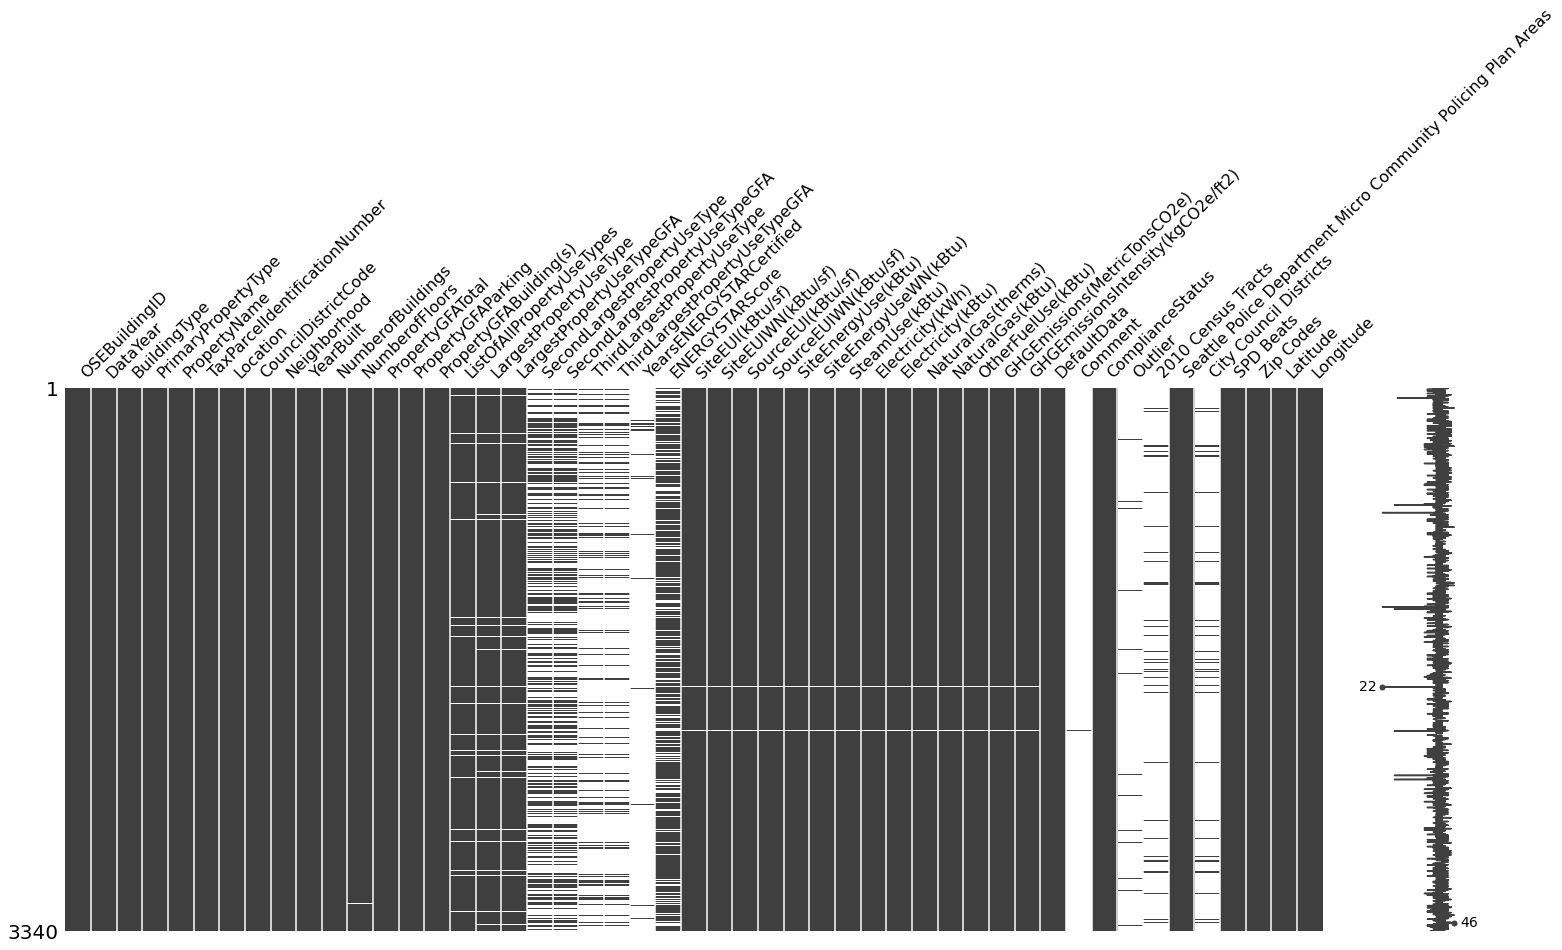

In [53]:
msno.matrix(df2015);

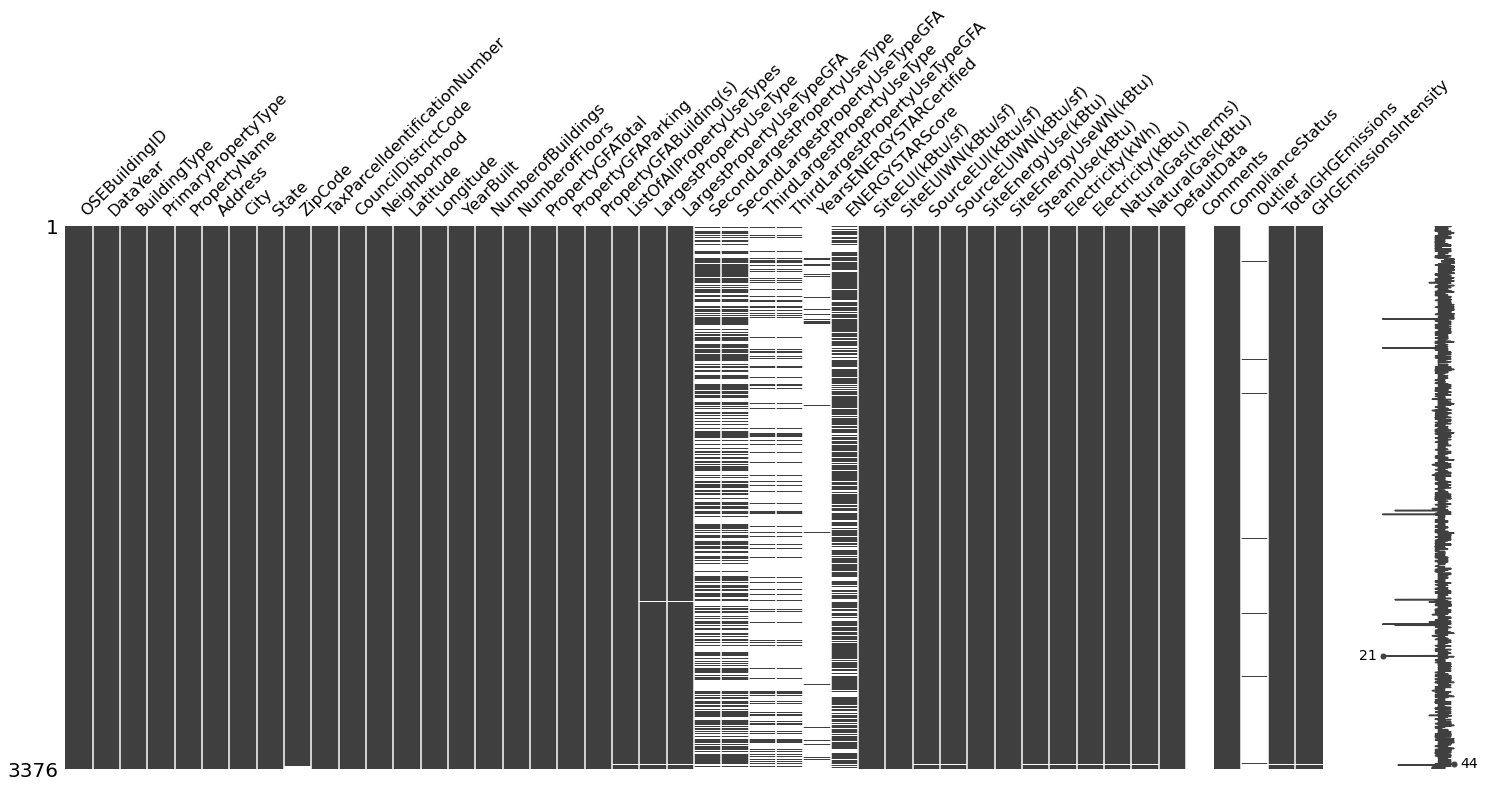

In [54]:
msno.matrix(df2016);

## Suppression des colonnes sans lien avec la problématique

In [55]:
Liste_var_supprimées = []

# Nettoyage de données

## Recherche de doublons

### Recherche de doublons intra 2015

In [56]:
len(df2015['OSEBuildingID'].unique())

3340

Il y a autant de OSEBuildingID uniques que d'entrées dans le df2015, ce qui indique une absence de doublons.

### Recherche de doublons intra 2016

In [57]:
len(df2016['OSEBuildingID'].unique())

3376

Il y a autant de OSEBuildingID uniques que d'entrées dans le df2016, ce qui indique une absence de doublons.

### Recouvrement entre les datasets de 2015 et 2016 ; et de la pertinence de travailler avec les deux datasets réunis

On compare les OSEBuildingID du df2015 avec ceux du df2016.

In [58]:
Set_OSEBuildingID_2015 = set(df2015['OSEBuildingID'])
Set_OSEBuildingID_2016 = set(df2016['OSEBuildingID'])

#### Union 2015 et 2016

In [59]:
len(Set_OSEBuildingID_2015 | Set_OSEBuildingID_2016)

3432

En joignant les datasets 2015 et 2016, on passerait de 3376 à 3432 bâtiments dans un nouveau dataset (soit un gain de 1.7%). Le gain en nb de bâtiments est trop faible pour prendre le risque de joindre des données qui ont disparu pour une raison non déterminée entre 2015 et 2016.  
Pour notre mission de prédiction de données, nous ne travaillerons donc qu'avec le dataset le plus récent : celui de 2016.

#### Intersection 2015 et 2016 (supprimer car inutile)

In [60]:
len(Set_OSEBuildingID_2015 & Set_OSEBuildingID_2016)

3284

## Exécution du nettoyage

# Analyse exploratoire

## Histogrammes

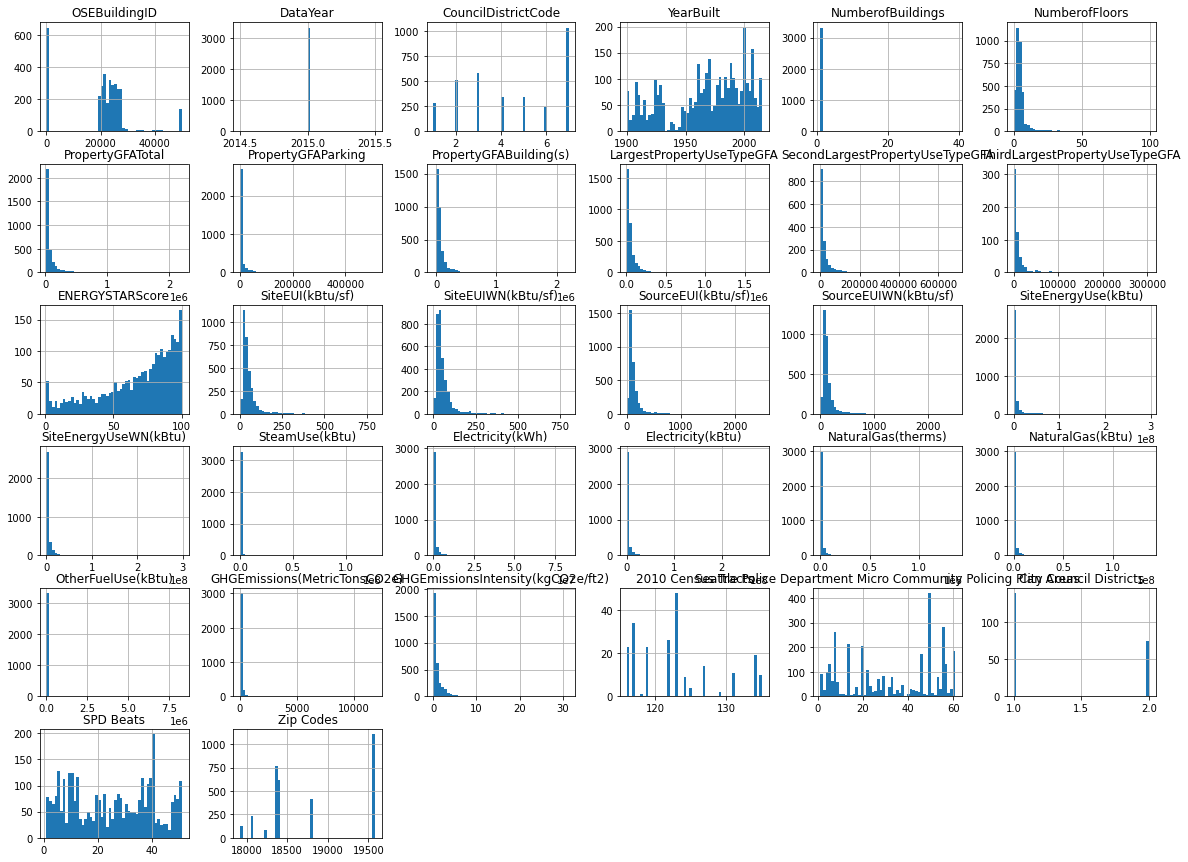

In [61]:
df2015.hist(bins=50, figsize=(20,15))
plt.show()

## Scatter plots

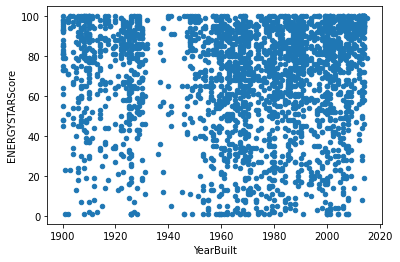

In [62]:
df2015.plot(kind="scatter", x="YearBuilt", y="ENERGYSTARScore");

## Latitude / longitude

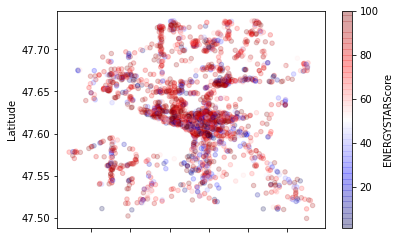

In [86]:
df2015.plot(kind="scatter", x="Longitude", y="Latitude", c='ENERGYSTARScore', label=None, cmap=plt.get_cmap("seismic"), alpha=0.2);

# Sauvegarde du df nettoyé

In [64]:
df.to_pickle('df_après_nettoyage_Projet_élec.pkl')

NameError: name 'df' is not defined